# Used Cars For Sale in the USA 🚗

### Importing all the neccessary packages

In [1084]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data as dataframe

In [1085]:
df = pd.read_csv("used_cars_prices (cleaned).csv")
df.head()

,Manufacturer,Year,Price (USD),MPG MIN,MPG MAX,Engine Volume (L),Mileage,Accidents or damage,1-owner vehicle,Personal use only,...,Seller Reviews Count,Car Rating,Car Reviews Count,Car Recommendation Rate,Car Comfort Rating,Car Interior Rating,Car Performance Rating,Car Value Rating,Car Exterior Rating,Car Reliability Rating
0,Hyundai,2022.0,29691.0,NaN,NaN,2.5,36007.0,1.0,1.0,1.0,...,855.0,4.2,37.0,75.0,4.2,4.1,4.3,3.7,4.5,4.2
1,MINI,2016.0,9500.0,25.0,35.0,1.5,104753.0,0.0,0.0,1.0,...,17.0,4.8,12.0,91.0,4.8,4.7,4.9,4.6,4.9,4.7
2,Mitsubishi,2022.0,20999.0,25.0,26.0,1.5,60922.0,0.0,1.0,0.0,...,513.0,4.6,9.0,88.0,4.6,4.4,4.4,4.6,4.6,4.3
3,FIAT,2013.0,5999.0,31.0,34.0,1.4,78996.0,0.0,0.0,1.0,...,4.0,4.5,124.0,88.0,4.2,4.5,4.4,4.4,4.7,4.4
4,Jeep,2023.0,26304.0,23.0,29.0,1.3,1075.0,0.0,0.0,0.0,...,324.0,5.0,2.0,100.0,5.0,5.0,4.5,5.0,5.0,5.0


### Data Exploration

In [1086]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8635 entries, 0 to 8634
Data columns (total 59 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Manufacturer                      7934 non-null   object 
 1   Year                              7934 non-null   float64
 2   Price (USD)                       7932 non-null   float64
 3   MPG MIN                           7183 non-null   float64
 4   MPG MAX                           7183 non-null   float64
 5   Engine Volume (L)                 7050 non-null   float64
 6   Mileage                           7934 non-null   float64
 7   Accidents or damage               7830 non-null   float64
 8   1-owner vehicle                   7794 non-null   float64
 9   Personal use only                 7830 non-null   float64
 10  Adaptive Cruise Control           6383 non-null   float64
 11  Autopilot                         6383 non-null   float64
 12  Cooled

The code above shows that there a lot of columns with missing values

In [1087]:
descriptive_stat = df.describe().T
descriptive_stat

,count,mean,std,min,25%,50%,75%,max
Year,7934.0,2017.239476,7.564430,1930.0,2015.00,2019.0,2022.00,2025.0
Price (USD),7932.0,23014.543999,10141.764004,1499.0,15247.75,22956.5,29998.00,45077.0
MPG MIN,7183.0,21.191842,8.004869,0.0,18.00,21.0,25.00,87.0
MPG MAX,7183.0,26.912892,9.354998,0.0,24.00,28.0,32.00,87.0
Engine Volume (L),7050.0,3.294213,20.727206,0.0,2.00,2.5,3.60,1600.0
Mileage,7934.0,66402.211369,46462.819977,0.0,31004.75,58542.5,92071.75,625000.0
Accidents or damage,7830.0,0.301533,0.458953,0.0,0.00,0.0,1.00,1.0
1-owner vehicle,7794.0,0.476264,0.499468,0.0,0.00,0.0,1.00,1.0
Personal use only,7830.0,0.672797,0.469222,0.0,0.00,1.0,1.00,1.0
Adaptive Cruise Control,6383.0,0.332916,0.471294,0.0,0.00,0.0,1.00,1.0


The code above shows that even though there are a lot of columns, most of the columns are binary column or are already encoded columns like Fuel type, Transmission, and Drivetrain. It seems like there are also a lot of ratings in this dataset which might tell us how goo dthe car is and might show how expensive the car is

In [1088]:
descriptive_stat[descriptive_stat['max'] != 1]

,count,mean,std,min,25%,50%,75%,max
Year,7934.0,2017.239476,7.564430,1930.0,2015.00,2019.0,2022.00,2025.0
Price (USD),7932.0,23014.543999,10141.764004,1499.0,15247.75,22956.5,29998.00,45077.0
MPG MIN,7183.0,21.191842,8.004869,0.0,18.00,21.0,25.00,87.0
MPG MAX,7183.0,26.912892,9.354998,0.0,24.00,28.0,32.00,87.0
Engine Volume (L),7050.0,3.294213,20.727206,0.0,2.00,2.5,3.60,1600.0
Mileage,7934.0,66402.211369,46462.819977,0.0,31004.75,58542.5,92071.75,625000.0
Seller Rating,4610.0,4.385076,0.611241,1.1,4.20,4.6,4.80,5.0
Seller Reviews Count,6158.0,183.678792,254.473311,0.0,7.00,53.0,281.00,998.0
Car Rating,7477.0,4.540203,0.448264,1.0,4.40,4.6,4.80,5.0
Car Reviews Count,7200.0,69.458611,107.355810,2.0,11.00,30.0,78.00,837.0


In the code above, I first of all compute the descriptive statistic of the dataframe which is the df variable. By selecting only the columns with a max value of 1, it means that I'm selecting the columns with only 0 and 1 (I have checked this and all the columns with a max value of 1 is all binary values)

We are going to predict car's price, which means that the target variable is the 'Price (USD)' column

In [1089]:
column_missing_values_count = df.isna().sum().to_numpy()
column_missing_values_pct = column_missing_values_count / len(df) * 100
print("Missing Values: ", column_missing_values_pct)

Missing Values:  [ 8.11812391  8.11812391  8.14128547 16.81528662 16.81528662 18.35552982
  8.11812391  9.32252461  9.73943254  9.32252461 26.07990735 26.07990735
 26.07990735 26.07990735 26.07990735 26.07990735 26.07990735 26.07990735
 26.07990735 14.58019687 14.58019687 14.58019687 14.58019687 14.58019687
 14.58019687 14.58019687 14.58019687 16.38679792 16.38679792 16.38679792
 16.38679792 16.38679792  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 46.61262305 28.68558193 13.41053851 16.61841343 16.537348   13.41053851
 13.41053851 13.41053851 13.41053851 13.41053851 13.43370006]


What I did in the code above is that I count all the missing values and show it as a percentage. <br>
Most of the columns have 13%-17% missing values. There are also a lot of columns with 26% missing values. One of the column has a missing value of 46% which means that we might not use that column since it does not give us any information that might boost our prediction.

In [1090]:
df['Manufacturer'].unique()

array(['Hyundai', 'MINI', 'Mitsubishi', 'FIAT', 'Jeep', 'Mazda', 'Subaru',
       'Toyota', 'Lincoln', 'Lexus', 'Chevrolet', 'Dodge', 'Ford',
       'INFINITI', 'BMW', 'Acura', 'Buick', 'Volkswagen', 'Jaguar', 'Kia',
       'Nissan', 'Audi', 'Honda', 'Chrysler', 'Volvo', 'Land', 'Plymouth',
       'Mercury', 'Saturn', 'Porsche', 'Mercedes-Benz', 'Cadillac',
       'Suzuki', 'GMC', 'RAM', 'Genesis', 'Pontiac', 'Scion',
       'Oldsmobile', 'Hummer', nan, 'Polestar', 'Tesla', 'Alfa', 'Fisker',
       'Bentley', 'smart', 'Isuzu', 'Datsun', 'Maserati', 'Saab', 'Geo',
       'MG', 'Aston', 'Austin-Healey', 'Rolls-Royce', 'Kaiser'],
      dtype=object)

The overall data shows 59 columns in total, all of them are continuous data except the 'Manufaturer' column. <br>
The Manufacturer column is definitely something that might give us a lot of information since some Manufacturer often creates an expensive cars and some create a more economic car.

Let's check the missing values. It seems like some of the column has a lot of missing values

In [1091]:
too_many_missing_values_idx = np.where(column_missing_values_pct >= 40)
df.isna().sum()[df.columns[too_many_missing_values_idx]]

Seller Rating    4025
dtype: int64

This is that one column that has 46% missing value: Seller Rating

In [1092]:
many_missing_values_idx = np.where((column_missing_values_pct > 20) & (column_missing_values_pct < 40))
df.isna().sum()[df.columns[many_missing_values_idx]]

Adaptive Cruise Control    2252
Autopilot                  2252
Cooled Seats               2252
Heated Seats               2252
Heated Steering Wheel      2252
Keyless Start              2252
Navigation System          2252
Power Liftgate             2252
Remote Start               2252
Seller Reviews Count       2477
dtype: int64

In [1093]:
df[df.columns[many_missing_values_idx]].describe()

,Adaptive Cruise Control,Autopilot,Cooled Seats,Heated Seats,Heated Steering Wheel,Keyless Start,Navigation System,Power Liftgate,Remote Start,Seller Reviews Count
count,6383.000000,6383.000000,6383.00000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6158.000000
mean,0.332916,0.003133,0.11938,0.663638,0.333542,0.698104,0.595018,0.321322,0.441642,183.678792
std,0.471294,0.055893,0.32426,0.472501,0.471515,0.459116,0.490927,0.467021,0.496622,254.473311
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
50%,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,53.000000
75%,1.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,281.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,998.000000


Based on what I can see from these missing values, Seller Rating has missing value of more than 40%, meaning there are so many missing values that we could say that it's hard to say that this column can give us any help for prediction. Seller Rating is also often subjective or based on opinion. It might not give us a lot of information that we might need to consider to remove this column. <br><br>
There are also other missing values of more than 20% which are right above this markdown text. But most of the missing values were binary data and it looks like its talking about a specific feature of a car and it looks like some of these features are rare. <br>
What I can get from this is that if a car has a specific feature, it's rare that the seller wouldn't fill in the column. If there are so many unique features, the seller wouldnt bother to fill in all the features that the car does not have, but he would definitely remember to fill in the ones that the car has. So if there is any missing values, we could consider filling it as 0 if most cars doesn't have that feature or 1 if most cars have that feature.

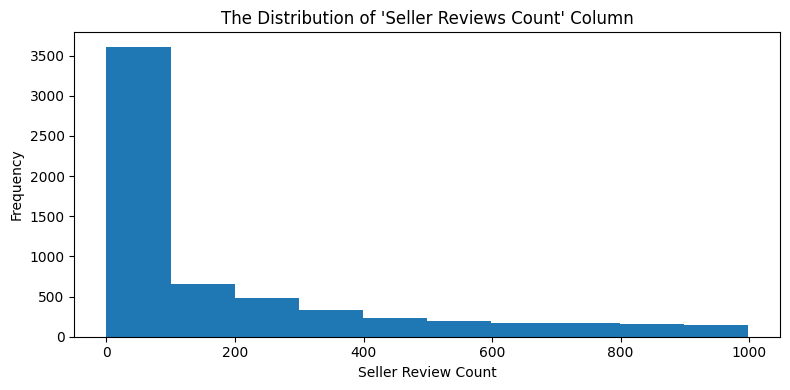

In [1094]:
plt.figure(figsize=(8, 4))
plt.hist(df['Seller Reviews Count'])
plt.title("The Distribution of 'Seller Reviews Count' Column")
plt.xlabel('Seller Review Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Most of the seller review count is scattered around 0-100. I wonder if it means that the more seller review count, the more common the car is (so maybe it's more cheaper since it's not rare) or maybe because it's very popular. <br>
Hypothesis: Seller Review Count effects car price

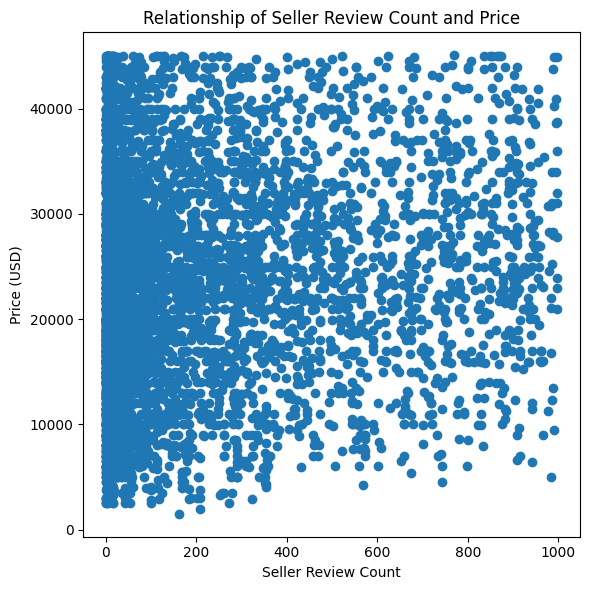

In [1095]:
plt.figure(figsize=(6, 6))
plt.scatter(df['Seller Reviews Count'], df['Price (USD)'])
plt.title('Relationship of Seller Review Count and Price')
plt.xlabel('Seller Review Count')
plt.ylabel('Price (USD)')
plt.tight_layout()
plt.show()

It doesn't seem like Seller Reivew Count give us any information about the price. It's all scattered equally without any obvious relationship

In [1096]:
df['Seller Reviews Count'].corr(df['Price (USD)'])

np.float64(0.1549804020259626)

In [1097]:
sum(df['Seller Reviews Count'] == 0)

290

In [1098]:
df.groupby(df['Seller Reviews Count'] > 0)['Price (USD)'].mean()

Seller Reviews Count
False    23055.110358
True     23000.256563
Name: Price (USD), dtype: float64

So based on the scatter plot we saw that there isn't a clear relationship of Seller Reviews Count and Price (USD). Even the correlation is considered very weak which is 0.155. We might consider removing this column<br>
I wonder if other columns also have weak relationship with the car price

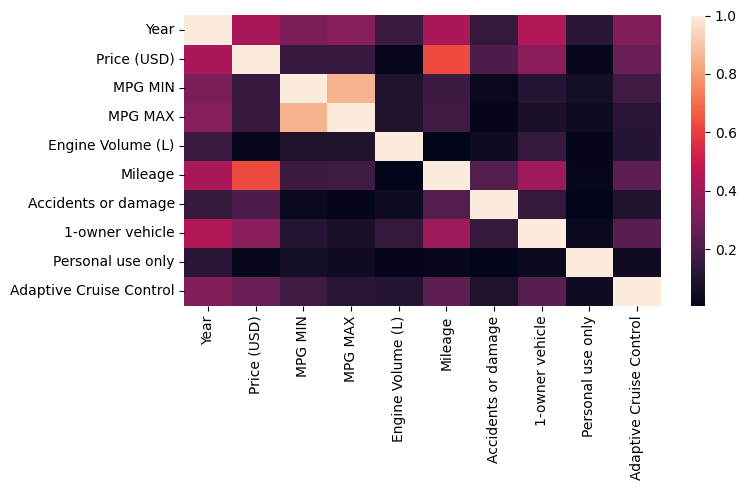

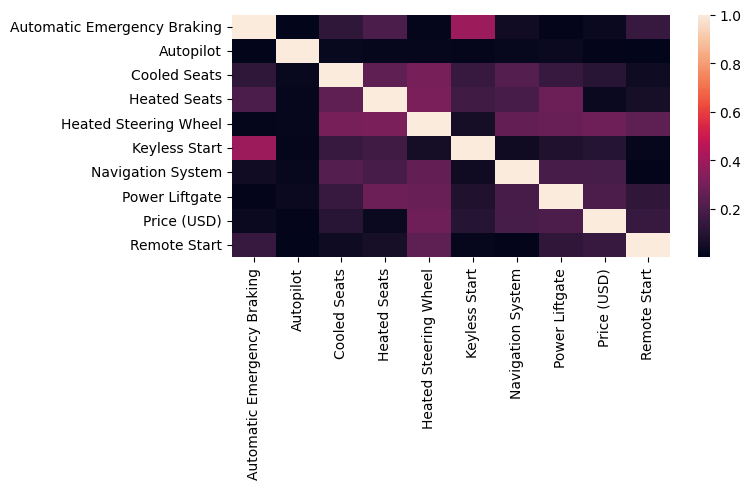

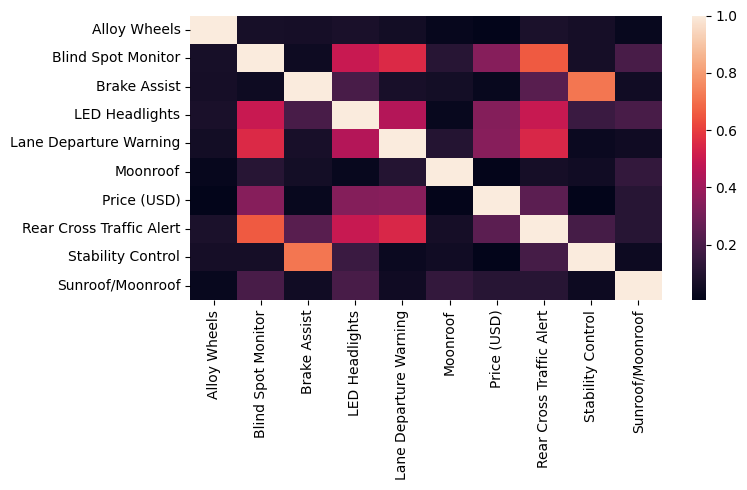

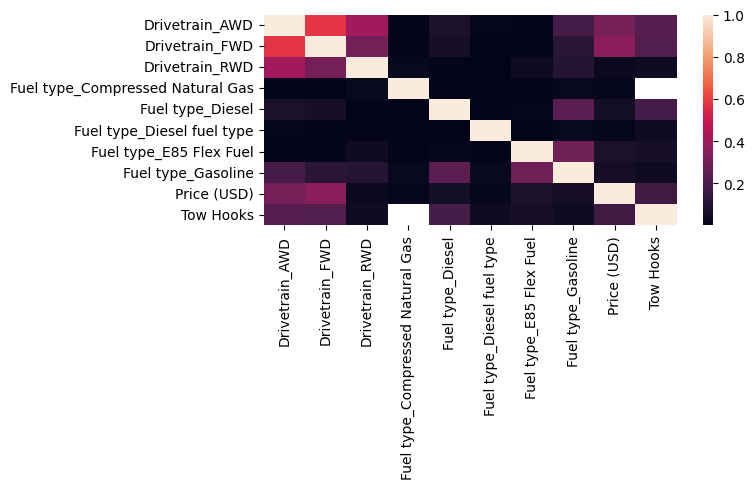

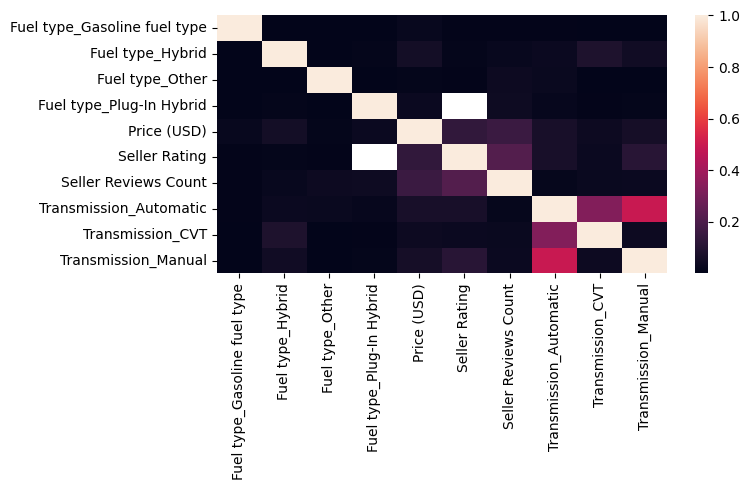

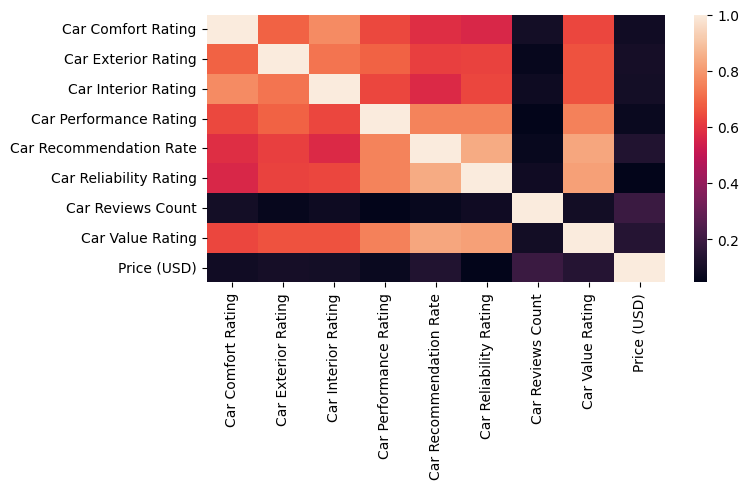

In [1099]:
columns_for_heatmap = [
    df.columns[1:11],
    df.columns[11:20].union(['Price (USD)']),
    df.columns[21:30].union(['Price (USD)']),
    df.columns[31:40].union(['Price (USD)']),
    df.columns[41:50].union(['Price (USD)']),
    df.columns[51:len(df.columns)].union(['Price (USD)'])
]

for columns in columns_for_heatmap:
    plt.figure(figsize=(8, 5))
    sns.heatmap(df.loc[:, columns].corr().abs(), annot=False)
    plt.tight_layout()
    plt.show()

Most of the columns here shows that there are a lot of columsn with a very low correlation with car prices. This means that most of the columns does not have a linear relationship with the target variable which is the car's price.<br>
My intuition says that we should simplify the dataset since there are a lot of features and we also must clean the data since there are a tons of missing values and possible outliers 

### Data Exploration and Preprocessing

### Removing uninformative and incomplete features

In [1100]:
df = df.drop(['Seller Rating', 'Personal use only'], axis=1)
df.head()

,Manufacturer,Year,Price (USD),MPG MIN,MPG MAX,Engine Volume (L),Mileage,Accidents or damage,1-owner vehicle,Adaptive Cruise Control,...,Seller Reviews Count,Car Rating,Car Reviews Count,Car Recommendation Rate,Car Comfort Rating,Car Interior Rating,Car Performance Rating,Car Value Rating,Car Exterior Rating,Car Reliability Rating
0,Hyundai,2022.0,29691.0,NaN,NaN,2.5,36007.0,1.0,1.0,1.0,...,855.0,4.2,37.0,75.0,4.2,4.1,4.3,3.7,4.5,4.2
1,MINI,2016.0,9500.0,25.0,35.0,1.5,104753.0,0.0,0.0,0.0,...,17.0,4.8,12.0,91.0,4.8,4.7,4.9,4.6,4.9,4.7
2,Mitsubishi,2022.0,20999.0,25.0,26.0,1.5,60922.0,0.0,1.0,0.0,...,513.0,4.6,9.0,88.0,4.6,4.4,4.4,4.6,4.6,4.3
3,FIAT,2013.0,5999.0,31.0,34.0,1.4,78996.0,0.0,0.0,0.0,...,4.0,4.5,124.0,88.0,4.2,4.5,4.4,4.4,4.7,4.4
4,Jeep,2023.0,26304.0,23.0,29.0,1.3,1075.0,0.0,0.0,0.0,...,324.0,5.0,2.0,100.0,5.0,5.0,4.5,5.0,5.0,5.0


The reason for dropping these 2 column is because 'Seller Rating' has a lot of missing values, while 'Personal use only' can only tell us whether the car will be used for Personal use or not, which doesn't really tell us what it could do or change the car's price

In [1101]:
not_categorical_col = [col for col in df.columns if (
    'Fuel type' not in col and
    'Transmission' not in col and
    'Drivetrain' not in col and
    col != 'Manufacturer'
)]
df_not_categorical = df[not_categorical_col].head()
df_not_categorical

,Year,Price (USD),MPG MIN,MPG MAX,Engine Volume (L),Mileage,Accidents or damage,1-owner vehicle,Adaptive Cruise Control,Autopilot,...,Seller Reviews Count,Car Rating,Car Reviews Count,Car Recommendation Rate,Car Comfort Rating,Car Interior Rating,Car Performance Rating,Car Value Rating,Car Exterior Rating,Car Reliability Rating
0,2022.0,29691.0,NaN,NaN,2.5,36007.0,1.0,1.0,1.0,0.0,...,855.0,4.2,37.0,75.0,4.2,4.1,4.3,3.7,4.5,4.2
1,2016.0,9500.0,25.0,35.0,1.5,104753.0,0.0,0.0,0.0,0.0,...,17.0,4.8,12.0,91.0,4.8,4.7,4.9,4.6,4.9,4.7
2,2022.0,20999.0,25.0,26.0,1.5,60922.0,0.0,1.0,0.0,0.0,...,513.0,4.6,9.0,88.0,4.6,4.4,4.4,4.6,4.6,4.3
3,2013.0,5999.0,31.0,34.0,1.4,78996.0,0.0,0.0,0.0,0.0,...,4.0,4.5,124.0,88.0,4.2,4.5,4.4,4.4,4.7,4.4
4,2023.0,26304.0,23.0,29.0,1.3,1075.0,0.0,0.0,0.0,0.0,...,324.0,5.0,2.0,100.0,5.0,5.0,4.5,5.0,5.0,5.0


What I did in the code above is just to select the columns that contains continuous data or binary values

In [1102]:
low_correlations = []
for col in not_categorical_col:
    corr = df['Price (USD)'].corr(df[col])
    if corr < 0.2:
        low_correlations.append(col)

low_correlations
for col in low_correlations:
    print(df[col].value_counts(normalize=True, ascending=False).head())

MPG MIN
19.0    0.089099
22.0    0.085062
20.0    0.072672
18.0    0.072115
17.0    0.069330
Name: proportion, dtype: float64
MPG MAX
28.0    0.089795
30.0    0.069609
25.0    0.068217
0.0     0.067938
26.0    0.063622
Name: proportion, dtype: float64
Engine Volume (L)
2.0    0.226525
3.6    0.100993
2.5    0.094752
3.5    0.085390
1.5    0.068085
Name: proportion, dtype: float64
Mileage
54000.0     0.000756
75000.0     0.000630
30000.0     0.000504
127000.0    0.000504
71000.0     0.000504
Name: proportion, dtype: float64
Accidents or damage
0.0    0.698467
1.0    0.301533
Name: proportion, dtype: float64
Autopilot
0.0    0.996867
1.0    0.003133
Name: proportion, dtype: float64
Cooled Seats
0.0    0.88062
1.0    0.11938
Name: proportion, dtype: float64
Heated Seats
1.0    0.663638
0.0    0.336362
Name: proportion, dtype: float64
Keyless Start
1.0    0.698104
0.0    0.301896
Name: proportion, dtype: float64
Navigation System
1.0    0.595018
0.0    0.404982
Name: proportion, dtype: flo

Moonroof, Alloy Wheels, and Autopilot have a very weak correlation with car prices and also, most of the values are the same from one data to the other. For example, 99% of the data has a value of 0 on Autopilot column. To make the features simpler, we should consider dropping columns where more than 95% of the data has the same value

In [1103]:
df = df.drop(['Moonroof', 'Alloy Wheels', 'Autopilot'], axis=1)
df.head()

,Manufacturer,Year,Price (USD),MPG MIN,MPG MAX,Engine Volume (L),Mileage,Accidents or damage,1-owner vehicle,Adaptive Cruise Control,...,Seller Reviews Count,Car Rating,Car Reviews Count,Car Recommendation Rate,Car Comfort Rating,Car Interior Rating,Car Performance Rating,Car Value Rating,Car Exterior Rating,Car Reliability Rating
0,Hyundai,2022.0,29691.0,NaN,NaN,2.5,36007.0,1.0,1.0,1.0,...,855.0,4.2,37.0,75.0,4.2,4.1,4.3,3.7,4.5,4.2
1,MINI,2016.0,9500.0,25.0,35.0,1.5,104753.0,0.0,0.0,0.0,...,17.0,4.8,12.0,91.0,4.8,4.7,4.9,4.6,4.9,4.7
2,Mitsubishi,2022.0,20999.0,25.0,26.0,1.5,60922.0,0.0,1.0,0.0,...,513.0,4.6,9.0,88.0,4.6,4.4,4.4,4.6,4.6,4.3
3,FIAT,2013.0,5999.0,31.0,34.0,1.4,78996.0,0.0,0.0,0.0,...,4.0,4.5,124.0,88.0,4.2,4.5,4.4,4.4,4.7,4.4
4,Jeep,2023.0,26304.0,23.0,29.0,1.3,1075.0,0.0,0.0,0.0,...,324.0,5.0,2.0,100.0,5.0,5.0,4.5,5.0,5.0,5.0


### Dealing with missing values

Even though the fuel type, transmission, and the drivetrain has already been encoded, I wonder if there are any missing values

In [1104]:
fuel_type_columns = [col for col in df.columns if 'Fuel type' in col]
transmission_columns = [col for col in df.columns if 'Transmission' in col]
drivetrain_columns = [col for col in df.columns if 'Drivetrain' in col]

encoded_categorical_values = pd.DataFrame({
    'Fuel type': df[fuel_type_columns].sum(axis=1).describe(),
    'Transmission': df[transmission_columns].sum(axis=1).describe(),
    'Drivetrain': df[drivetrain_columns].sum(axis=1).describe(),
}).T
encoded_categorical_values['missing'] = [
    (df[fuel_type_columns].sum(axis=1) == 0).sum(),
    (df[transmission_columns].sum(axis=1) == 0).sum(),
    (df[drivetrain_columns].sum(axis=1) == 0).sum(),
]
encoded_categorical_values

,count,mean,std,min,25%,50%,75%,max,missing
Fuel type,8635.0,0.888246,0.315082,0.0,1.0,1.0,1.0,1.0,965
Transmission,8635.0,0.902721,0.296354,0.0,1.0,1.0,1.0,1.0,840
Drivetrain,8635.0,0.910828,0.285008,0.0,1.0,1.0,1.0,1.0,770


In the encoded_categorical_values variable, it shows that there is a lot of missing value for those categorical column. We should probably create a new category to denote that the value is missing. We will denote it as 'Missing'

In [1116]:
def revert_encode(row, col_name, cols):
    for col in cols:
        if row[col] == 1:
            return col.replace(f'{col_name}_', '')
    return None

df['Fuel Type'] = df.apply(lambda row: revert_encode(row, 'Fuel type', fuel_type_columns), axis=1)
df['Transmission'] = df.apply(lambda row: revert_encode(row, 'Transmission', transmission_columns), axis=1)
df['Drivetrain'] = df.apply(lambda row: revert_encode(row, 'Drivetrain', drivetrain_columns), axis=1)
encoded_categorical_columns = fuel_type_columns + transmission_columns + drivetrain_columns
df_clean = df.drop(encoded_categorical_columns, axis=1)

What I did in the code above is that I transform all the encoded columns like Fuel type, Transmission, and Drivetrain, and then compute it as 1 categorical column each

In [1117]:
df_clean.head()

,Manufacturer,Year,Price (USD),MPG MIN,MPG MAX,Engine Volume (L),Mileage,Accidents or damage,1-owner vehicle,Adaptive Cruise Control,...,Car Recommendation Rate,Car Comfort Rating,Car Interior Rating,Car Performance Rating,Car Value Rating,Car Exterior Rating,Car Reliability Rating,Fuel Type,Transmission,Drivetrain
0,Hyundai,2022.0,29691.0,NaN,NaN,2.5,36007.0,1.0,1.0,1.0,...,75.0,4.2,4.1,4.3,3.7,4.5,4.2,Gasoline,Automatic,AWD
1,MINI,2016.0,9500.0,25.0,35.0,1.5,104753.0,0.0,0.0,0.0,...,91.0,4.8,4.7,4.9,4.6,4.9,4.7,Gasoline,Manual,FWD
2,Mitsubishi,2022.0,20999.0,25.0,26.0,1.5,60922.0,0.0,1.0,0.0,...,88.0,4.6,4.4,4.4,4.6,4.6,4.3,Gasoline,Automatic,AWD
3,FIAT,2013.0,5999.0,31.0,34.0,1.4,78996.0,0.0,0.0,0.0,...,88.0,4.2,4.5,4.4,4.4,4.7,4.4,Gasoline,Automatic,FWD
4,Jeep,2023.0,26304.0,23.0,29.0,1.3,1075.0,0.0,0.0,0.0,...,100.0,5.0,5.0,4.5,5.0,5.0,5.0,Gasoline,Automatic,AWD


In [1118]:
df_clean['Fuel Type'] = df_clean['Fuel Type'].fillna('Missing')
df_clean['Transmission'] = df_clean['Transmission'].fillna('Missing')
df_clean['Drivetrain'] = df_clean['Drivetrain'].fillna('Missing')
categorical_columns = ['Fuel Type', 'Transmission', 'Drivetrain']
df_clean = pd.get_dummies(df_clean, columns=categorical_columns, prefix=categorical_columns)

The code above means that after I have filled all the misisng values of the categorical data with category 'Missing', the I encode it back

In [1119]:
df_clean.head()

,Manufacturer,Year,Price (USD),MPG MIN,MPG MAX,Engine Volume (L),Mileage,Accidents or damage,1-owner vehicle,Adaptive Cruise Control,...,Fuel Type_Other,Fuel Type_Plug-In Hybrid,Transmission_Automatic,Transmission_CVT,Transmission_Manual,Transmission_Missing,Drivetrain_AWD,Drivetrain_FWD,Drivetrain_Missing,Drivetrain_RWD
0,Hyundai,2022.0,29691.0,NaN,NaN,2.5,36007.0,1.0,1.0,1.0,...,False,False,True,False,False,False,True,False,False,False
1,MINI,2016.0,9500.0,25.0,35.0,1.5,104753.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,True,False,False
2,Mitsubishi,2022.0,20999.0,25.0,26.0,1.5,60922.0,0.0,1.0,0.0,...,False,False,True,False,False,False,True,False,False,False
3,FIAT,2013.0,5999.0,31.0,34.0,1.4,78996.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,True,False,False
4,Jeep,2023.0,26304.0,23.0,29.0,1.3,1075.0,0.0,0.0,0.0,...,False,False,True,False,False,False,True,False,False,False


Let's count the number of missing values in each row in the dataset

In [1120]:
pd.DataFrame(df_clean.isna().sum(axis=1), columns=['Missing Values Count']).describe()

,Missing Values Count
count,8635.000000
mean,6.337232
std,10.949343
min,0.000000
25%,0.000000
50%,1.000000
75%,8.000000
max,38.000000


The table above shows that based on the number of missing values, the median is 1, which means that in general, each row has 1 missing value. But there are also row with more than 8 missing value and even 38 missing values. Those rows that has a lot of missing value will definitely not help us in our model training. Not only that, filling them with a missing value might not be a good option since it increases our bias.

In [1121]:
null_values_per_row = df_clean.isnull().sum(axis=1)
sum(null_values_per_row > 10)

1640

We are going to drop the rows with more than 10 missing values since it means that the data is incomplete to be used for prediction

In [1122]:
df_clean = df_clean.drop(df_clean[null_values_per_row > 10].index)
df_clean = df_clean.drop(df_clean[df_clean['Price (USD)'].isna()].index)
df_clean

,Manufacturer,Year,Price (USD),MPG MIN,MPG MAX,Engine Volume (L),Mileage,Accidents or damage,1-owner vehicle,Adaptive Cruise Control,...,Fuel Type_Other,Fuel Type_Plug-In Hybrid,Transmission_Automatic,Transmission_CVT,Transmission_Manual,Transmission_Missing,Drivetrain_AWD,Drivetrain_FWD,Drivetrain_Missing,Drivetrain_RWD
0,Hyundai,2022.0,29691.0,NaN,NaN,2.5,36007.0,1.0,1.0,1.0,...,False,False,True,False,False,False,True,False,False,False
1,MINI,2016.0,9500.0,25.0,35.0,1.5,104753.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,True,False,False
2,Mitsubishi,2022.0,20999.0,25.0,26.0,1.5,60922.0,0.0,1.0,0.0,...,False,False,True,False,False,False,True,False,False,False
3,FIAT,2013.0,5999.0,31.0,34.0,1.4,78996.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,True,False,False
4,Jeep,2023.0,26304.0,23.0,29.0,1.3,1075.0,0.0,0.0,0.0,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8629,GMC,2023.0,23498.0,24.0,29.0,1.5,30775.0,0.0,1.0,0.0,...,False,False,True,False,False,False,False,True,False,False
8630,Ford,2019.0,26988.0,17.0,22.0,3.5,129487.0,0.0,1.0,0.0,...,False,False,True,False,False,False,True,False,False,False
8632,Hyundai,2022.0,26998.0,22.0,25.0,NaN,15321.0,0.0,1.0,0.0,...,False,False,True,False,False,False,True,False,False,False
8633,Ford,2021.0,30973.0,19.0,19.0,2.3,35154.0,0.0,1.0,1.0,...,False,False,True,False,False,False,True,False,False,False


In [1123]:
still_missing = df_clean.isna().sum()
still_missing_col = still_missing[still_missing > 0].index
missing_values_stat = df_clean[still_missing_col].describe().T
missing_values_stat

,count,mean,std,min,25%,50%,75%,max
MPG MIN,6558.0,21.603233,7.454336,0.0,18.0,21.0,25.0,87.00
MPG MAX,6558.0,27.515599,8.537494,0.0,24.0,28.0,32.0,87.00
Engine Volume (L),6280.0,2.850271,1.207725,0.0,2.0,2.5,3.6,6.75
Accidents or damage,6965.0,0.302225,0.459255,0.0,0.0,0.0,1.0,1.00
1-owner vehicle,6938.0,0.490487,0.499946,0.0,0.0,0.0,1.0,1.00
Adaptive Cruise Control,6222.0,0.332690,0.471215,0.0,0.0,0.0,1.0,1.00
Cooled Seats,6222.0,0.120861,0.325992,0.0,0.0,0.0,0.0,1.00
Heated Seats,6222.0,0.664417,0.472232,0.0,0.0,1.0,1.0,1.00
Heated Steering Wheel,6222.0,0.333173,0.471386,0.0,0.0,0.0,1.0,1.00
Keyless Start,6222.0,0.706043,0.455609,0.0,0.0,1.0,1.0,1.00


The table above shows all the columns with missing values. We are now going to deal with those missing values. Most of the missing values are the values which contains binary values. As I have already said before, we could put the mode which is our best choice since the seller either expect it to always be 0 or always be 1 and that's why the value is missing

In [1124]:
df_clean

,Manufacturer,Year,Price (USD),MPG MIN,MPG MAX,Engine Volume (L),Mileage,Accidents or damage,1-owner vehicle,Adaptive Cruise Control,...,Fuel Type_Other,Fuel Type_Plug-In Hybrid,Transmission_Automatic,Transmission_CVT,Transmission_Manual,Transmission_Missing,Drivetrain_AWD,Drivetrain_FWD,Drivetrain_Missing,Drivetrain_RWD
0,Hyundai,2022.0,29691.0,NaN,NaN,2.5,36007.0,1.0,1.0,1.0,...,False,False,True,False,False,False,True,False,False,False
1,MINI,2016.0,9500.0,25.0,35.0,1.5,104753.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,True,False,False
2,Mitsubishi,2022.0,20999.0,25.0,26.0,1.5,60922.0,0.0,1.0,0.0,...,False,False,True,False,False,False,True,False,False,False
3,FIAT,2013.0,5999.0,31.0,34.0,1.4,78996.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,True,False,False
4,Jeep,2023.0,26304.0,23.0,29.0,1.3,1075.0,0.0,0.0,0.0,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8629,GMC,2023.0,23498.0,24.0,29.0,1.5,30775.0,0.0,1.0,0.0,...,False,False,True,False,False,False,False,True,False,False
8630,Ford,2019.0,26988.0,17.0,22.0,3.5,129487.0,0.0,1.0,0.0,...,False,False,True,False,False,False,True,False,False,False
8632,Hyundai,2022.0,26998.0,22.0,25.0,NaN,15321.0,0.0,1.0,0.0,...,False,False,True,False,False,False,True,False,False,False
8633,Ford,2021.0,30973.0,19.0,19.0,2.3,35154.0,0.0,1.0,1.0,...,False,False,True,False,False,False,True,False,False,False


In [1125]:
binary_missing_col = missing_values_stat[missing_values_stat['max'] == 1].index
for col in binary_missing_col:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])
still_missing = df_clean.isna().sum()
still_missing_col = still_missing[still_missing > 0].index
missing_values_stat = df_clean[still_missing_col].describe().T
missing_value_count = pd.DataFrame(df_clean.isna().sum()[missing_values_stat.index], columns=['missing value count'])
missing_values_stat = pd.concat([missing_values_stat, missing_value_count], axis=1)
missing_values_stat

,count,mean,std,min,25%,50%,75%,max,missing value count
MPG MIN,6558.0,21.603233,7.454336,0.0,18.0,21.0,25.0,87.00,435
MPG MAX,6558.0,27.515599,8.537494,0.0,24.0,28.0,32.0,87.00,435
Engine Volume (L),6280.0,2.850271,1.207725,0.0,2.0,2.5,3.6,6.75,713
Seller Reviews Count,5456.0,188.731488,259.468118,0.0,7.0,54.0,286.0,998.00,1537
Car Rating,6779.0,4.545567,0.451210,1.0,4.4,4.7,4.8,5.00,214
Car Reviews Count,6555.0,71.118993,109.214064,2.0,11.0,30.0,80.0,837.00,438
Car Recommendation Rate,6562.0,88.055319,12.390148,28.0,84.0,92.0,96.0,100.00,431
Car Comfort Rating,6779.0,4.623912,0.344941,1.0,4.5,4.7,4.8,5.00,214
Car Interior Rating,6779.0,4.590648,0.347500,1.0,4.5,4.7,4.8,5.00,214
Car Performance Rating,6779.0,4.536775,0.409269,1.0,4.4,4.6,4.8,5.00,214


There are 13 more columns which contains missing values. Let's see the distribution of each columns

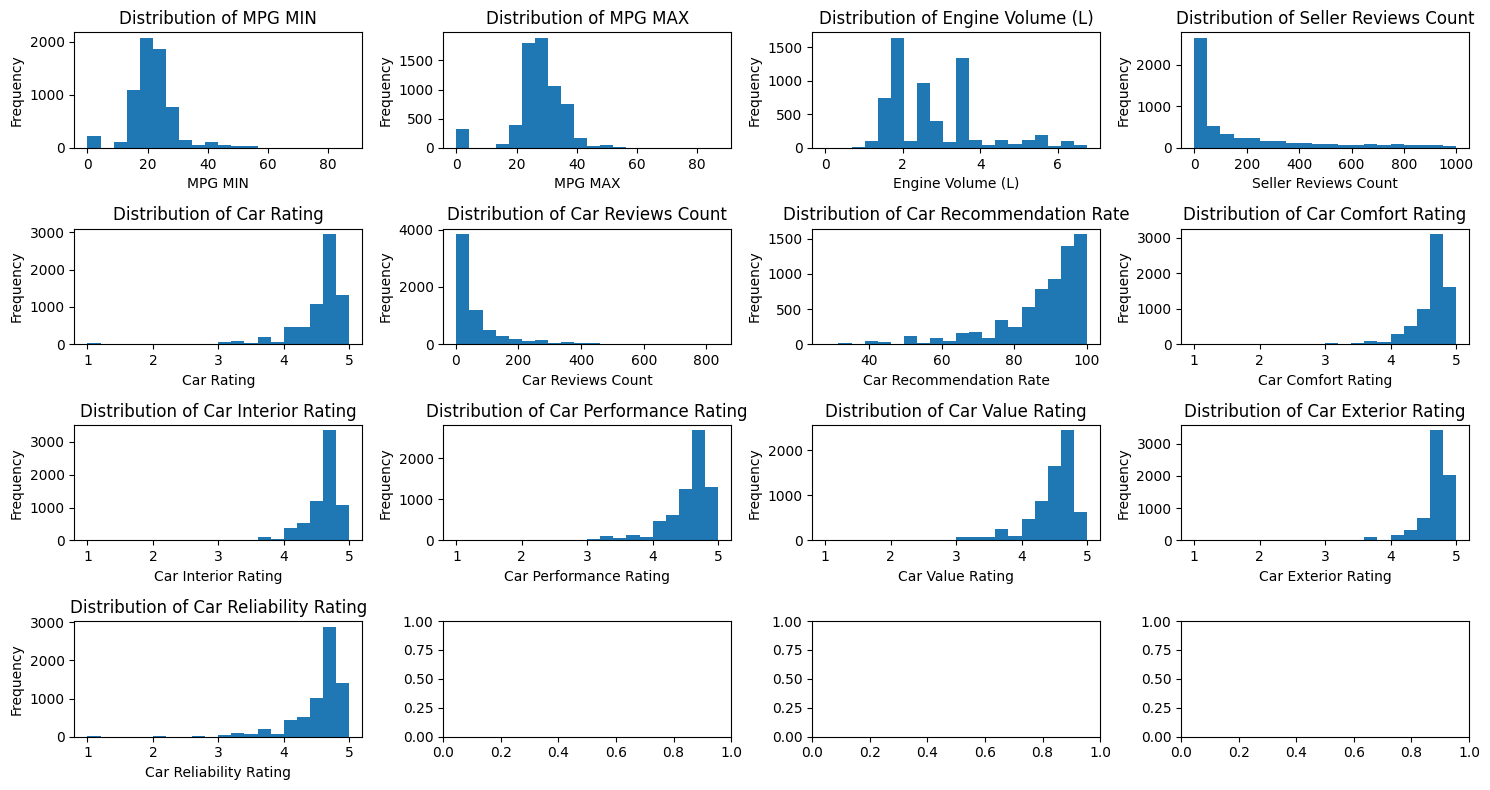

In [1126]:
missing_values_col_dist = [col for col in missing_values_stat.index]
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15, 8))
ax = ax.flatten()
for i, col in enumerate(missing_values_col_dist):
    ax[i].hist(df_clean[col], bins=20)
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

For column: 'MPG MIN', 'MPG MAX', and 'Engine Volume (L)', we are going to fill the missing values with a random value ranging based on a normal distribution where most of the value will have a z-score of less than or equal to 1 <br>
For column: the rest of the columns, since the skewness is very severe, we can just use any random value to keep the skewness

In [1127]:
fill_along_mean_col = ['MPG MIN', 'MPG MAX', 'Engine Volume (L)']
fill_random_val_col = [col for col in missing_values_col_dist if col not in fill_along_mean_col]

for col in fill_along_mean_col:
    random_values = np.random.normal(
        df_clean[col].mean(),
        df_clean[col].std(),
        size=df_clean[col].isna().sum()
    )
    random_values = np.clip(random_values, df[col].min(), df[col].max())
    df_clean.loc[df_clean[col].isna(), col] = random_values

for col in fill_random_val_col:
    random_values = np.random.choice(
        df_clean[col].dropna(),
        size=df_clean[col].isna().sum()
    )
    df_clean.loc[df_clean[col].isna(), col] = random_values

df_clean.isna().sum()

Manufacturer                        0
Year                                0
Price (USD)                         0
MPG MIN                             0
MPG MAX                             0
Engine Volume (L)                   0
Mileage                             0
Accidents or damage                 0
1-owner vehicle                     0
Adaptive Cruise Control             0
Cooled Seats                        0
Heated Seats                        0
Heated Steering Wheel               0
Keyless Start                       0
Navigation System                   0
Power Liftgate                      0
Remote Start                        0
Automatic Emergency Braking         0
Backup Camera                       0
Blind Spot Monitor                  0
Brake Assist                        0
LED Headlights                      0
Lane Departure Warning              0
Rear Cross Traffic Alert            0
Stability Control                   0
Sunroof/Moonroof                    0
Tow Hitch   

### Removing outliers

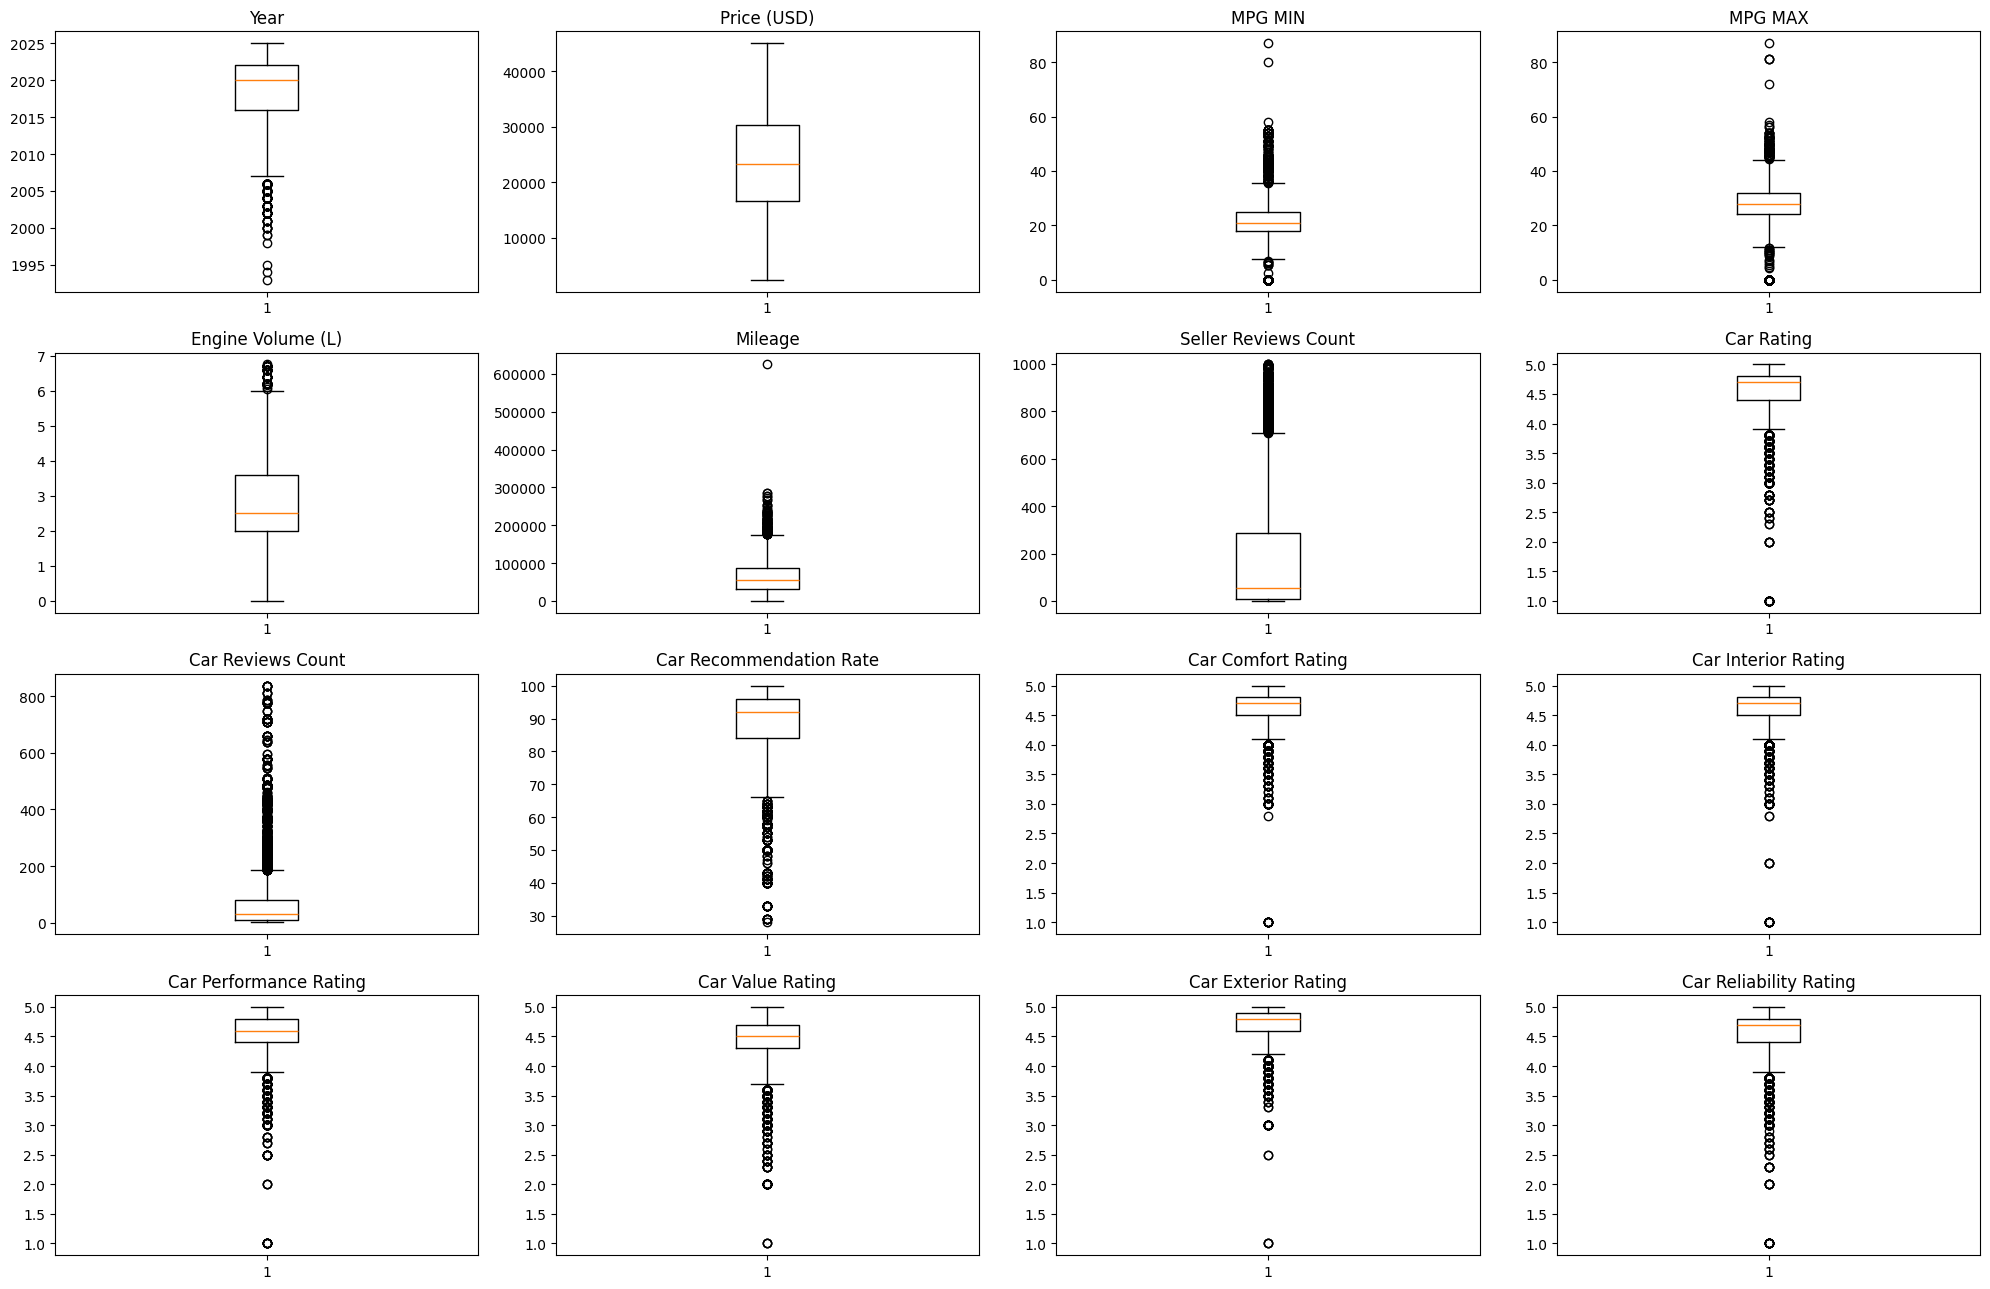

In [1128]:
descriptive_stat = df_clean.describe().T
continuous_values_col = descriptive_stat[descriptive_stat['max'] != 1].index

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 13))
ax = ax.flatten()
for i, col in enumerate(continuous_values_col):
    ax[i].boxplot(df_clean[col].dropna())
    ax[i].set_title(col)
plt.tight_layout()
plt.show()

Based on this boxplot, we can see that there are some outliers in the data. But we can't directly say that there is an outlier in these columns values. But let's check if any of these values looks suspicious

In [1129]:
outliers = df_clean[
    (df_clean['Mileage'] > 600000) |
    (df_clean['MPG MIN'] > 60) | 
    (df_clean['MPG MAX'] > 60) | 
    (df_clean['Engine Volume (L)'] > 7)
]
outliers.T

,589,3370,5219,6571,7650,8438
Manufacturer,Ford,Ford,Jaguar,Ford,Ford,Chevrolet
Year,2015.0,2017.0,2020.0,2016.0,2015.0,2019.0
Price (USD),7495.0,8595.0,26999.0,12999.0,10999.0,14788.0
MPG MIN,40.0,87.0,80.0,40.0,40.0,26.0
MPG MAX,81.0,87.0,72.0,81.0,81.0,31.0
Engine Volume (L),2.0,2.0,5.908755,2.0,2.0,1.4
Mileage,134548.0,90748.0,45999.0,77875.0,98635.0,625000.0
Accidents or damage,1.0,1.0,0.0,1.0,0.0,0.0
1-owner vehicle,0.0,0.0,0.0,1.0,0.0,0.0
Adaptive Cruise Control,0.0,0.0,1.0,0.0,0.0,0.0


After a little bit of research, this is what I found: <br><br>
A Ford car using Drivetrain-FWD and using Gasoline type having MPG MIN and MPG MAX of 80's are impossible to have. Even the high ones are probably only around 40. <br>
A Jaguar on 2020 using Drivetrain-AWD and using Gasoline fuel type having MPG MIN of 80 is also impossible. And weirdly, MPG MIN > MPG MAX. Now I wonder if there are cars where MPG MIN > MPG MAX as well<br>
Chevrolet, a car at 2019 and already hitting 600k mileage? Fuel type of Gasoline and the price is normal with that amount of mileage? Something is definitely wrong! <br>
It's also almost impossible to have a car with 7L of engine volume and still have a high value of MPG MIN and MPG MAX

In [1130]:
df_clean = df_clean.drop(outliers.index)

Since we just saw some of the MPG MIN and MPG MAX value, there are some very clear corrupted values on MPG MIN and MPG MAX. <br>
MPG MIN or MPG MAX of 0 means one thing: It's a missing value disguised as 0 <br>
MPG MIN > MPG MAX is logically false since MPG MIN is definitely lower than MPG MAX just judging by it's name

In [1131]:
corrupted_mpg = df_clean[
    (df_clean['MPG MIN'] == 0) | 
    (df_clean['MPG MAX'] == 0) | 
    (df_clean['MPG MIN'] > df_clean['MPG MAX'])
]
corrupted_mpg

,Manufacturer,Year,Price (USD),MPG MIN,MPG MAX,Engine Volume (L),Mileage,Accidents or damage,1-owner vehicle,Adaptive Cruise Control,...,Fuel Type_Other,Fuel Type_Plug-In Hybrid,Transmission_Automatic,Transmission_CVT,Transmission_Manual,Transmission_Missing,Drivetrain_AWD,Drivetrain_FWD,Drivetrain_Missing,Drivetrain_RWD
8,Toyota,2018.0,23995.0,29.535360,28.954230,1.800000,55321.0,0.0,1.0,1.0,...,False,False,True,False,False,False,False,True,False,False
10,Lexus,2006.0,6999.0,31.000000,27.000000,3.300000,185341.0,0.0,0.0,0.0,...,False,False,False,True,False,False,True,False,False,False
37,INFINITI,2004.0,5390.0,0.000000,0.000000,3.500000,140814.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,False,False,True
44,BMW,2023.0,36979.0,32.498520,28.056348,4.272134,8814.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,False,False,True
45,Land,2007.0,9999.0,17.000000,12.000000,4.400000,114922.0,0.0,0.0,0.0,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8566,Kia,2023.0,37638.0,36.077211,9.582035,4.665367,11621.0,0.0,1.0,1.0,...,False,False,True,False,False,False,True,False,False,False
8592,Toyota,2021.0,28998.0,35.031344,34.010781,3.640282,26481.0,0.0,1.0,0.0,...,False,False,True,False,False,False,True,False,False,False
8613,Lexus,2011.0,18500.0,30.804909,28.695162,4.600000,118250.0,0.0,0.0,1.0,...,False,False,True,False,False,False,True,False,False,False
8615,Toyota,2020.0,22529.0,54.000000,53.000000,1.800000,55187.0,1.0,0.0,1.0,...,False,False,True,False,False,False,False,True,False,False


Wow, 658 rows have a corrupted MPG MIN and MPG MAX values. We should treat these values as null and fill them up with a reasonable value

In [1132]:
df_clean.loc[
    (df_clean["MPG MIN"] == 0) |
    (df_clean["MPG MAX"] == 0)
, ["MPG MIN", "MPG MAX"]] = np.nan
df_clean.loc[df_clean["MPG MAX"] == 0, "MPG MAX"] = np.nan
df_clean.loc[df_clean["MPG MAX"] < df_clean["MPG MIN"], ["MPG MIN", "MPG MAX"]] = np.nan
df_clean['MPG DIFF'] = df_clean["MPG MAX"] - df_clean["MPG MIN"]
df_clean['MPG DIFF'].describe()

count    6320.000000
mean        7.120898
std         3.117517
min         0.000000
25%         6.000000
50%         7.000000
75%         9.000000
max        40.414944
Name: MPG DIFF, dtype: float64

In [1135]:
len(df_clean)

6987

There are even dataset with a very impossible difference between MPG MIN and MPG MAX. Most cars usualy have MPG MIN and MPG MAX differnce of around 5-12, and only some cars can have a difference up to 20

In [1147]:
mpg_diff_upper_bound = df_clean['MPG DIFF'].quantile(.95)
corrupted_mpg_diff = df_clean['MPG DIFF'] > mpg_diff_upper_bound
df_clean.loc[corrupted_mpg_diff, 'MPG DIFF']

0       11.482336
34      12.000000
36      13.000000
163     12.000000
188     12.000000
          ...    
8376    16.291465
8443    23.733804
8509    12.000000
8530    12.000000
8624    20.545607
Name: MPG DIFF, Length: 279, dtype: float64

In [1148]:
df_clean.loc[
    corrupted_mpg_diff & 
    (df_clean['MPG DIFF'] <= 20) &
    (df_clean['Fuel Type_Hybrid'])
    , ['Fuel Type_Hybrid', 'MPG DIFF', 'Price (USD)']
].reset_index()

,index,Fuel Type_Hybrid,MPG DIFF,Price (USD)
0,414,True,18.972572,35960.0
1,443,True,14.414655,40999.0
2,1100,True,15.769436,30864.0
3,2140,True,16.198736,43795.0
4,3429,True,15.185739,21998.0
5,3494,True,14.764382,42998.0
6,4402,True,19.156911,42999.0
7,4493,True,17.849466,25642.0
8,4914,True,15.682164,16700.0
9,5469,True,13.631842,18885.0


In [1149]:
df_clean.loc[corrupted_mpg_diff, ['MPG MIN', 'MPG MAX']] = np.nan
df_clean.loc[corrupted_mpg_diff]

,Manufacturer,Year,Price (USD),MPG MIN,MPG MAX,Engine Volume (L),Mileage,Accidents or damage,1-owner vehicle,Adaptive Cruise Control,...,Fuel Type_Plug-In Hybrid,Transmission_Automatic,Transmission_CVT,Transmission_Manual,Transmission_Missing,Drivetrain_AWD,Drivetrain_FWD,Drivetrain_Missing,Drivetrain_RWD,MPG DIFF
0,Hyundai,2022.0,29691.0,NaN,NaN,2.500000,36007.0,1.0,1.0,1.0,...,False,True,False,False,False,True,False,False,False,11.482336
34,Volkswagen,2015.0,15998.0,NaN,NaN,2.062791,64367.0,0.0,1.0,0.0,...,False,True,False,False,False,False,False,False,True,12.000000
36,Chrysler,2015.0,11100.0,NaN,NaN,2.400000,76999.0,0.0,0.0,0.0,...,False,True,False,False,False,False,True,False,False,13.000000
163,Chevrolet,2016.0,9998.0,NaN,NaN,1.400000,64883.0,0.0,0.0,0.0,...,False,True,False,False,False,False,True,False,False,12.000000
188,Volvo,2015.0,14599.0,NaN,NaN,3.040430,98348.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,False,True,12.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8376,Audi,2015.0,14990.0,NaN,NaN,3.000000,116000.0,0.0,0.0,0.0,...,False,True,False,False,False,True,False,False,False,16.291465
8443,Chevrolet,2019.0,30990.0,NaN,NaN,3.600000,46400.0,0.0,1.0,0.0,...,False,True,False,False,False,False,False,False,True,23.733804
8509,BMW,2015.0,13800.0,NaN,NaN,2.000000,92890.0,0.0,0.0,0.0,...,False,True,False,False,False,True,False,False,False,12.000000
8530,Chevrolet,2014.0,34984.0,NaN,NaN,6.200000,57651.0,1.0,0.0,0.0,...,False,True,False,False,False,False,False,False,True,12.000000


What I just did is that I will try to clip the MPG DIFF (MPG difference) so that the upper bound is the 95th percentile. But I just realized that the 95th percentile is MPG DIFF of 11. Since cars can have MPG DIFF of up to 20, I tried to see what rows are in the above 95th percentile. <br>
After a little research as well, most cars with Fuel Type of hybrid might get 11-20 MPG DIFF. But it seems like 11 out of 279 that has a very high MPG DIFF are Hybrid cars, indiciating that there are a lot of potential data that might be corrupted. So I decided to clip and mark all the values of MPG MIN and MPG MAX to np.nan to later on be filled with a more reasonable value of MPG MIN and MPG MAX

In [1150]:
random_values = np.random.normal(
    df_clean['MPG MIN'].mean(),
    df_clean['MPG MIN'].std(),
    size=df_clean['MPG MIN'].isna().sum()
)
random_values = np.clip(random_values, df['MPG MIN'].min(), df['MPG MIN'].max())
df_clean.loc[df_clean['MPG MIN'].isna(), 'MPG MIN'] = random_values

def get_mpg_max(row):
    if not pd.isna(row['MPG MAX']): return row['MPG MAX']
    return row['MPG MIN'] + np.random.normal(df_clean['MPG DIFF'].mean(), df_clean['MPG DIFF'].std())

df_clean['MPG MAX'] = df_clean.apply(get_mpg_max, axis=1)
del df_clean['MPG DIFF']

What I did in the code above is that I created a random value for MPG MIN that revolves around normal distribution and clip them so that it does not go out of the current MPG MIN range. <br>
After that, I computed the MPG MAX with a more reasonable value, which is a value greater than MPG MIN by adding a random value to the MPG MIN. The range of the random value revolves around the MPG DIFF normal distribution

### Scaling and Data Transformation

We will do scaling and data transformation, where scaling makes sure that the data is scaled better (I will do StandardScaling which makes the value revolves around the mean value) and also do a log transformation especially on data that is pretty skewed

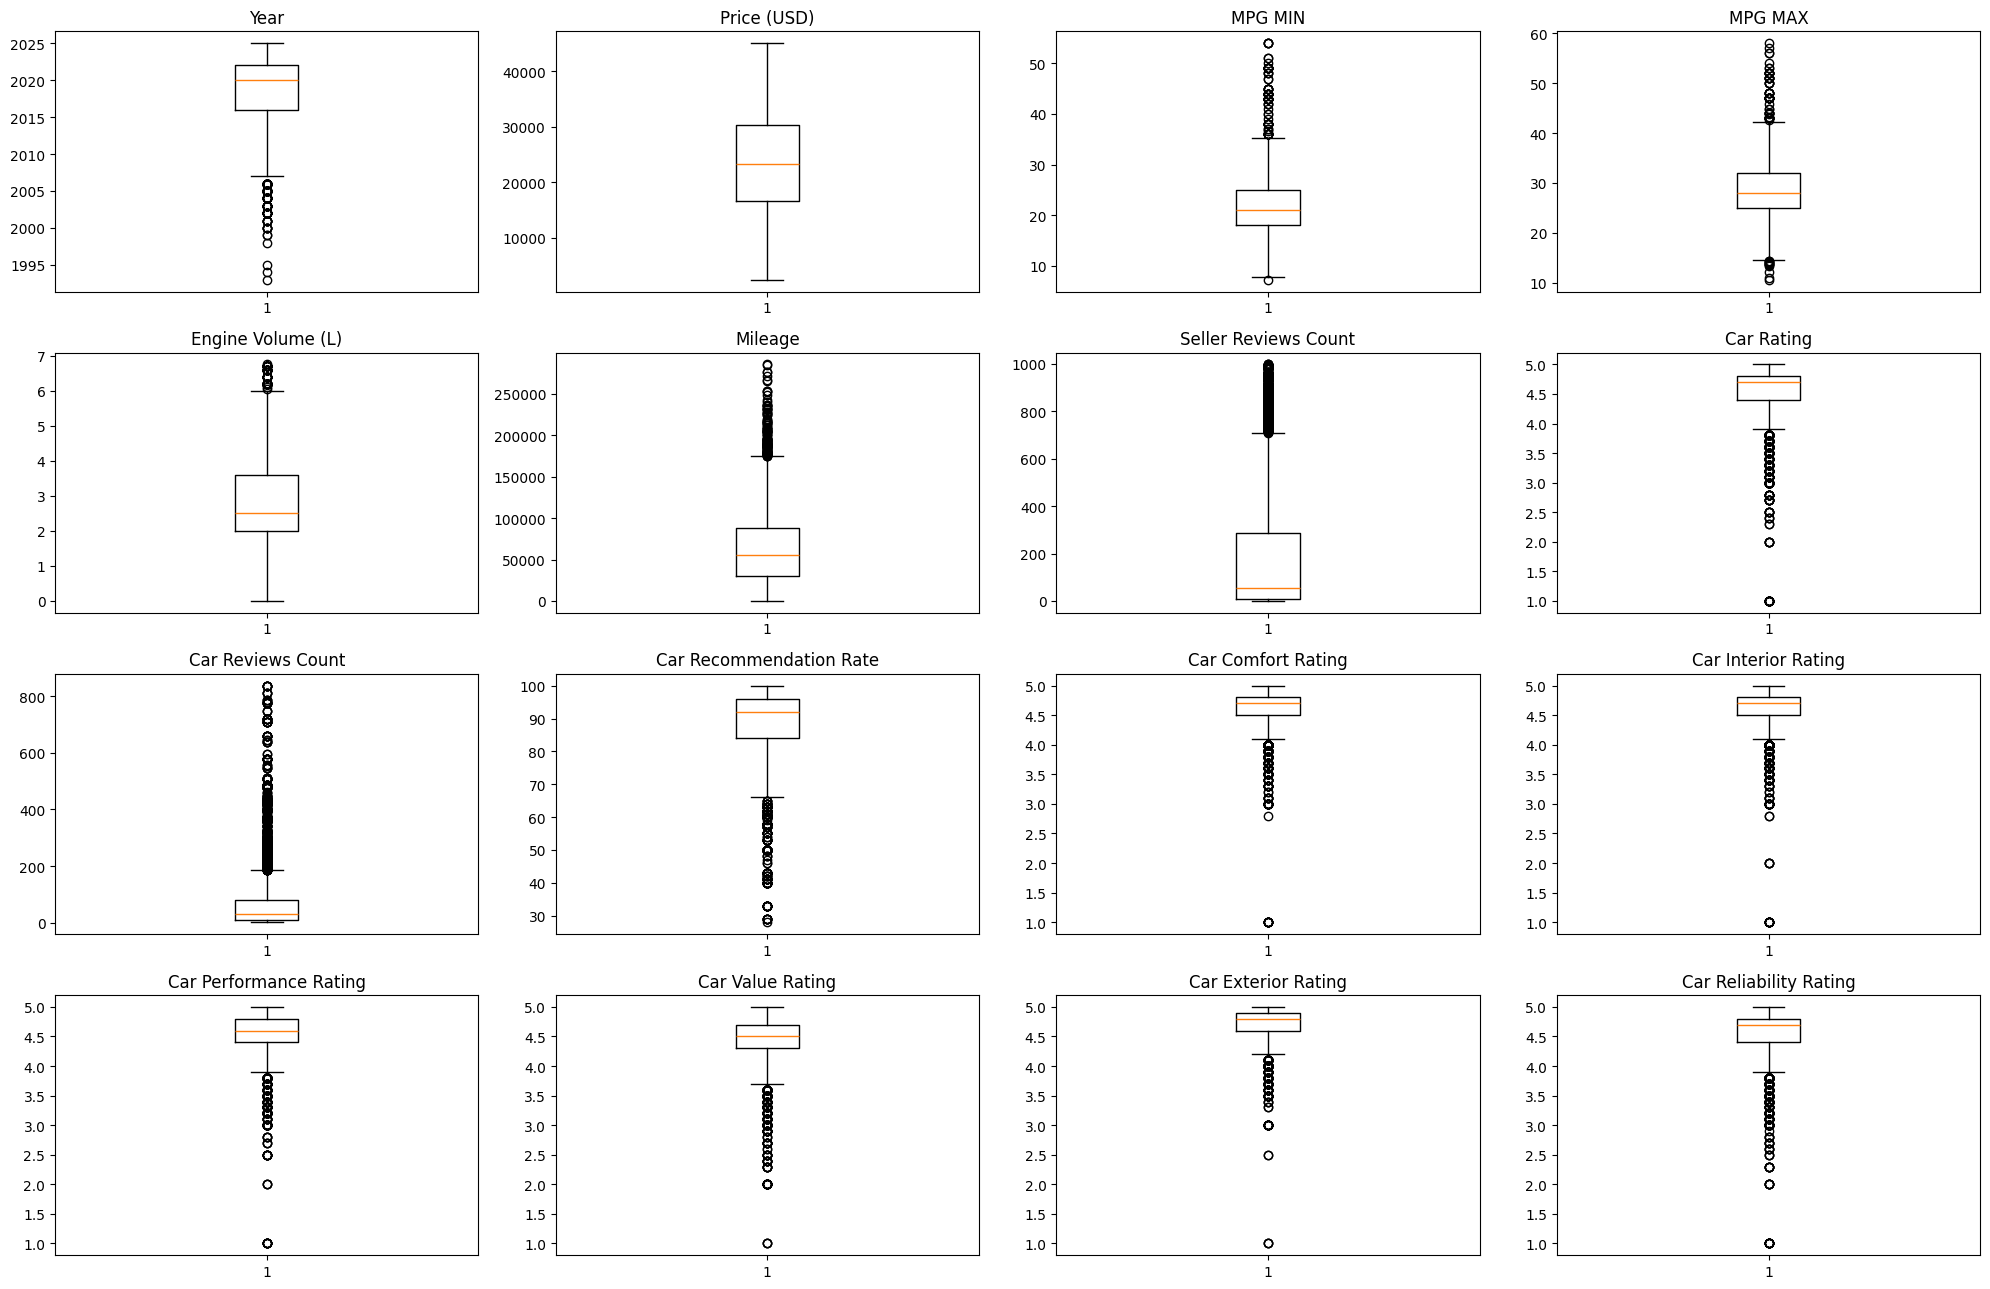

In [1151]:
descriptive_stat = df_clean.describe().T
continuous_values_col = descriptive_stat[descriptive_stat['max'] != 1].index

# fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 13))
ax = ax.flatten()
for i, col in enumerate(continuous_values_col):
    ax[i].boxplot(df_clean[col].dropna())
    ax[i].set_title(col)
plt.tight_layout()
plt.show()

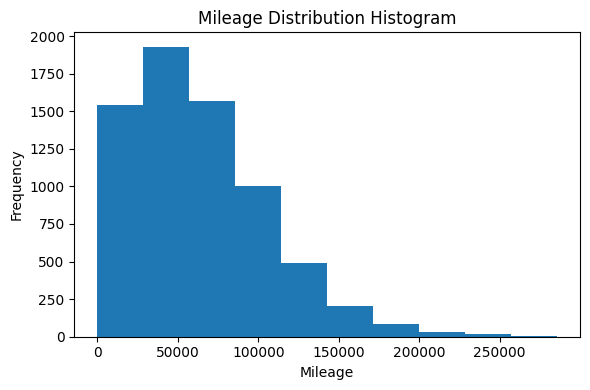

In [1012]:
plt.figure(figsize=(6, 4))
plt.hist(df_clean['Mileage'])
plt.title('Mileage Distribution Histogram')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Using StandardScaling might not be the best since the Mileage distribution is pretty skewed. Let's use log transformation first so that we could have a more reasonable value for StandardScaling

In [1152]:
df_clean["Mileage_log"] = np.log1p(df_clean["Mileage"])
df_clean['Mileage_log']

0       10.491496
1       11.559370
2       11.017366
3       11.277165
4        6.981006
          ...    
8629    10.334490
8630    11.771343
8632     9.637045
8633    10.467522
8634    10.557296
Name: Mileage_log, Length: 6987, dtype: float64

In [1153]:
from sklearn.preprocessing import StandardScaler

need_scale_col = ['Mileage_log', 'MPG MIN', 'MPG MAX', 'Engine Volume (L)']
scaler = StandardScaler()
for col in need_scale_col:
    df_clean[f"{col}_scaled"] = scaler.fit_transform(df_clean[[col]])
df_clean.loc[:, [f"{col}_scaled" for col in need_scale_col]]

,Mileage_log_scaled,MPG MIN_scaled,MPG MAX_scaled,Engine Volume (L)_scaled
0,-0.303934,1.098195,1.094930,-0.292167
1,0.891094,0.660701,1.195759,-1.123197
2,0.284552,0.660701,-0.443307,-1.123197
3,0.575287,1.848584,1.013641,-1.206300
4,-4.232430,0.264740,0.103049,-1.289403
...,...,...,...,...
8629,-0.479635,0.462721,0.103049,-1.123197
8630,1.128308,-0.923143,-1.171780,0.538863
8632,-1.260128,0.066760,-0.625425,-0.914093
8633,-0.330763,-0.527182,-1.718136,-0.458373


I decided to do StandardScaling on 4 columns, Mileage, MPG MIN, MPG MAX, Engine Volume (L). Last, before going into modeling, I encode the Manufacturer so that the model can learn from it (Model can't learn from strings that easily)

In [1154]:
df_clean = pd.get_dummies(df_clean, columns=['Manufacturer'])
df_clean.head()

,Year,Price (USD),MPG MIN,MPG MAX,Engine Volume (L),Mileage,Accidents or damage,1-owner vehicle,Adaptive Cruise Control,Cooled Seats,...,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Scion,Manufacturer_Subaru,Manufacturer_Suzuki,Manufacturer_Tesla,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Manufacturer_smart
0,2022.0,29691.0,27.209782,34.446352,2.5,36007.0,1.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,2016.0,9500.0,25.000000,35.000000,1.5,104753.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,2022.0,20999.0,25.000000,26.000000,1.5,60922.0,0.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,2013.0,5999.0,31.000000,34.000000,1.4,78996.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,2023.0,26304.0,23.000000,29.000000,1.3,1075.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


## Modeling

We will use all of the scaled and picked features for training our model, which predicts Car prices which is on column Price (USD)

In [1197]:
df_model = df_clean.drop(['MPG MIN', 'MPG MAX', 'Engine Volume (L)', 'Mileage', 'Mileage_log'], axis=1)
X = df_clean.drop(['Price (USD)', 'Seller Reviews Count'], axis=1)
y = df_clean['Price (USD)']

Like what most data scietist do, we split the data into 5-k folds in a cross validation. So let's make the scoring/evaluation metrics set first

In [ ]:
# from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, make_scorer

scoring = {
    'R2': 'r2',
    'MAE': make_scorer(mean_absolute_error),
    'RMSE': make_scorer(root_mean_squared_error)
}


In [ ]:
def show_evaluation(results, model_name):
    print(f"Evaluation result of {model_name}")
    print(f"R²: {results['test_R2'].mean():.3f}")
    print(f"MAE: ${results['test_MAE'].mean():.2f} USD")
    print(f"RMSE: ${results['test_RMSE'].mean():.2f} USD")


### 1st Model: Linear Regression

Training and Prediction

In [1206]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

linear_regression_model = LinearRegression()
results = cross_validate(linear_regression_model, X, y, cv=5, scoring=scoring)

Evaluation

In [1207]:
# evaluate_model(y_test, y_pred, 'Linear Regression')
show_evaluation(results, 'Linear Regression')

Evaluation result of Linear Regression
R²: 0.787
MAE: $3410.87 USD
RMSE: $4463.48 USD


Based on the evaluation, we got R² of 0.787 which is good enough for linear regression. It's in a simple way of saying, predict 78.7% of the variation of the data correctly. The difference between mean absolute error and root mean squared errors shows that some of the prediction got a pretty of prediction from the actual value.

## 2nd Model: Random Forest Regressor

Training

In [1208]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

results = cross_validate(random_forest, X, y, cv=5, scoring=scoring)

This Random Forest creates 500 different decision trees and let the tree fully grow since it actually perform better (I tried max_depth of 8 and 12 but it gives a worse prediction)

Evaluation

In [1209]:
show_evaluation(results, 'Random Forest Regressor')

Evaluation result of Random Forest Regressor
R²: 0.832
MAE: $2920.59 USD
RMSE: $3958.52 USD


Random Forest actually perform much better than linear regression getting R² of 0.832 and a decrease of 16% on MAE and a decrease of 13% on RMSE

/var/folders/48/_n6x3sr95hs3x66w52bj3krw0000gn/T/ipykernel_14699/1975946000.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
/var/folders/48/_n6x3sr95hs3x66w52bj3krw0000gn/T/ipykernel_14699/1975946000.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)


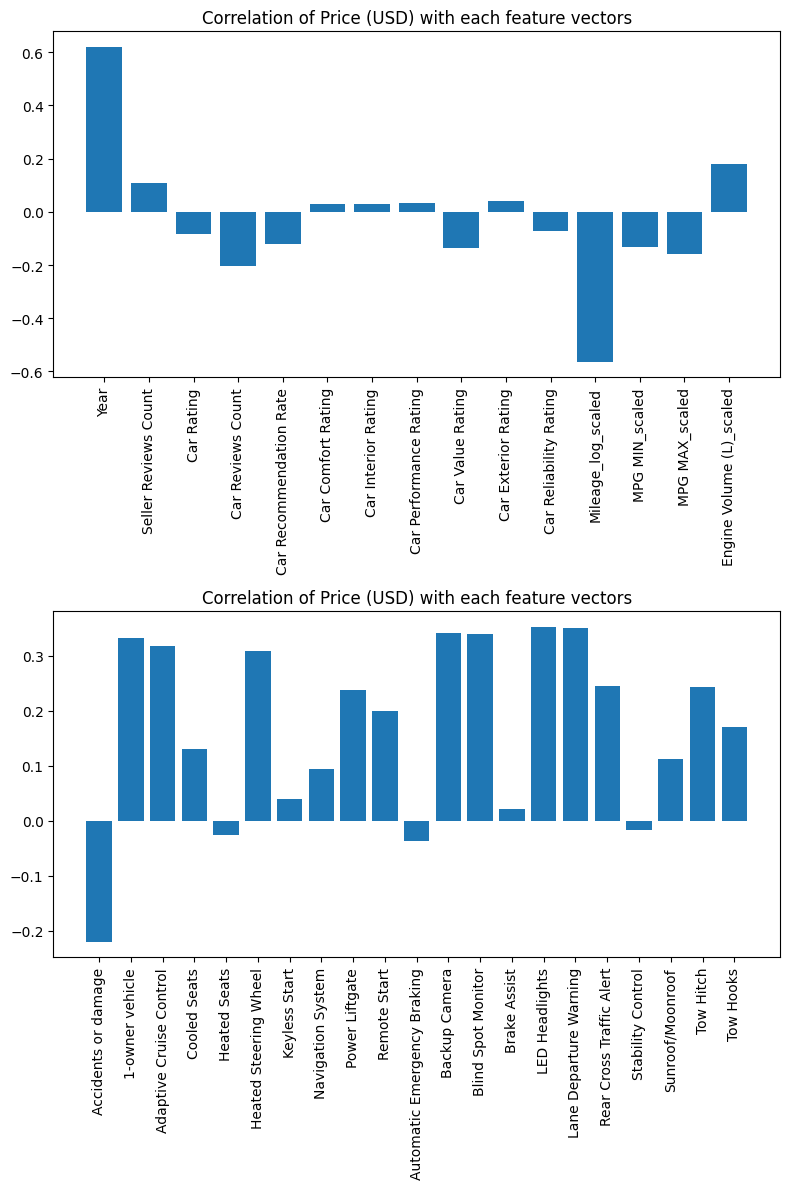

In [1210]:
df_model_stat = df_model.describe().T
features_groups = [
    df_model_stat[df_model_stat['max'] != 1].index,
    list(df_model_stat[df_model_stat['max'] == 1].index) + ['Price (USD)']
]
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(8, 12))
ax = ax.flatten()
for i, group in enumerate(features_groups):
    bar_data = df_model[group].corr()['Price (USD)']
    bar_data = bar_data.drop('Price (USD)')
    ax[i].bar(bar_data.index, bar_data.values)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
    ax[i].set_title('Correlation of Price (USD) with each feature vectors')
plt.tight_layout()
plt.show()

## Conclusion

Based on the evaluation metrics, the Random Forest Regressor model performs better Linear Regression on this dataset with my preprocessing strategy. Linear Regression explains about 78.7% of the variance (R² = 0.787), while Random Forest explains about 84.6% of the variance (R² = 0.846). The reason for this is because based on what I saw on the features, a lot of the features does not have a clear linear relationship with the car's price. Not only that, since Random Forest Regressor is a more complex modeling, it is expected to perform better, especially if tuned correctly. Random Forest Regressor is also very good if the data has a lot of binary values like what we see on this dataset.<br><br>
It's been fun trying out this dataset

## Recommendation

There are a couple of things that I recommend doing with this dataset. <br><br>
For a data scientist who knows a lot about cars, it is a good idea to go through each features for a better feature engineering. There are a lot of features in this dataset which might add more noise than good predictive value. Not only feature enginnering, those who know a lot about cars might know which data is considered unreliable like findin an outlier, or filling the missing value with a better value than what I did. Because maybe for example, MPG MIN and MPG MAX is effected by things like Fuel type, Drivetrain, Transmission, or even the Manufacturer. Knowing the relationship between each of them might give us a better information on what to fill in on the corrupted MPG MIN and MPG MAX values. <br><br>
On modeling, I recommend trying out other better and more advance models and tune the parameter correctly. With my lack of experience, I do now have a lot of knowledge about tuning parameters, so it's definitely a good idea to do so. 